# Assignment 3.2

# Sequence classification model

In [2]:
from __future__ import print_function

## 1. Preprocess data

#### Tasks:

* Create word vocabulary index (use 10.000 most frequent words)
* Preprocess training and validation set for model input. Use vocabulary index as lookup dictionary to transform raw text into integer sequences. You may use code from Practical 5.

In [18]:
import os
import sys
import numpy as np
import pandas as pd
import re
import nltk

from keras import regularizers

DATA_PATH = 'data'
EMBEDDING_PATH = 'embedding'
MODEL_PATH = 'model'

In [19]:
# YOUR CODE HERE 

# provide model inputs (sequences from training and validation set) and outputs (sentiment labels)
X_train = np.load(os.path.join(DATA_PATH,'X_train_word.npy'))
y_train = np.load(os.path.join(DATA_PATH,'y_train_word.npy'))

X_valid = np.load(os.path.join(DATA_PATH,'X_valid_word.npy'))
y_valid = np.load(os.path.join(DATA_PATH,'y_valid_word.npy'))

In [20]:
# here we only use smaller set to train our model 
# original set consists of 25.000 reviews

X_train = X_train[:10000]
y_train = y_train[:10000]

X_valid = X_valid[0:2000]
y_valid = y_valid[0:2000]

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)


(10000, 500) (10000,) (2000, 500) (2000,)


## 2. Sequence classification model

#### Tasks: 

* Create a RNN model to classify sequence of words on a binary classification task
* Compare four (4) different gate memory units
* Plot model performance (loss and accuracy) of these 4 models
* Present the performance (loss and accuarcy) of these 4 models in a comparison table

In [21]:
# YOUR CODE HERE 

# decide number of epochs and batch_size
vocab_size = 10003
sentence_length = len(X_train[0])
batch_size = 128
num_epochs = 10

from keras.layers import Embedding, Input, LSTM, Dense, GRU, Bidirectional
from keras.models import Model

### Model 1 : LSTM

In [22]:
# YOUR CODE HERE
# MODEL-1: LSTM

# construct the model
sequence_input = Input(shape=(500,), name='input_layer', dtype='int32')
embedding_layer = Embedding(vocab_size+1, 64, input_length=500, name='word_embedding')
embedded_sequences = embedding_layer(sequence_input)
lstm_layer = LSTM(64, name='lstm_layer')(embedded_sequences)
output_layer = Dense(1, name='prediction_layer', activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))(lstm_layer)

lstm_model = Model(sequence_input, output_layer)

### Model 2: GRU

In [23]:
# YOUR CODE HERE
# MODEL-2: GRU

# construct the model
sequence_input = Input(shape=(500,), name='input_layer', dtype='int32')
embedding_layer = Embedding(vocab_size+1, 64, input_length=500, name='word_embedding')
embedded_sequences = embedding_layer(sequence_input)
GRU_layer = GRU(64, name='gru_layer')(embedded_sequences)
output_layer = Dense(1, name='prediction_layer', activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))(GRU_layer)

gru_model = Model(sequence_input, output_layer)


### Model 3 : Bidirectional LSTM

In [24]:
# YOUR CODE HERE
# MODEL-3: Bidirectional LSTM

# construct the model
sequence_input = Input(shape=(500,), name='input_layer', dtype='int32')
embedding_layer = Embedding(vocab_size+1, 64, input_length=500, name='word_embedding')
embedded_sequences = embedding_layer(sequence_input)
bidirectional_layer = Bidirectional(LSTM(64, name='bi_lstm_layer'))(embedded_sequences)
output_layer = Dense(1, name='prediction_layer', activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))(bidirectional_layer)

bilstm_model = Model(sequence_input, output_layer)


### Model 4 : Bidirectional GRU

In [25]:
# YOUR CODE HERE
# MODEL-4: Bidirectional GRU

# construct the model
sequence_input = Input(shape=(500,), name='input_layer', dtype='int32')
embedding_layer = Embedding(vocab_size+1, 64, input_length=500, name='word_embedding')
embedded_sequences = embedding_layer(sequence_input)
bidirectional_layer = Bidirectional(GRU(64, name='bi_gru_layer'))(embedded_sequences)
output_layer = Dense(1, name='prediction_layer', activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))(bidirectional_layer)

bigru_model = Model(sequence_input, output_layer)


### Compile models

In [26]:
# YOUR CODE HERE 
# decide loss function, and optimizer
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
# YOUR CODE HERE 
# decide loss function, and optimizer
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# YOUR CODE HERE 
# decide loss function, and optimizer
bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
# YOUR CODE HERE 
# decide loss function, and optimizer
bigru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train models

In [30]:
# YOUR CODE HERE 
# add callback history during the training stage of the model
lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), \
               epochs=num_epochs, batch_size=batch_size)

Train on 10000 samples, validate on 2000 samples
Epoch 1/10
10000/10000 [==============================] - 117s 12ms/step - loss: 0.6095 - acc: 0.6722 - val_loss: 0.4969 - val_acc: 0.7730
Epoch 2/10
10000/10000 [==============================] - 123s 12ms/step - loss: 0.3596 - acc: 0.8658 - val_loss: 1.1472 - val_acc: 0.5865
Epoch 3/10
10000/10000 [==============================] - 112s 11ms/step - loss: 0.3704 - acc: 0.8781 - val_loss: 0.3858 - val_acc: 0.8460
Epoch 4/10
10000/10000 [==============================] - 116s 12ms/step - loss: 0.2279 - acc: 0.9293 - val_loss: 0.4292 - val_acc: 0.8490
Epoch 5/10
10000/10000 [==============================] - 121s 12ms/step - loss: 0.1601 - acc: 0.9591 - val_loss: 0.3698 - val_acc: 0.8655
Epoch 6/10
10000/10000 [==============================] - 110s 11ms/step - loss: 0.1485 - acc: 0.9647 - val_loss: 0.3878 - val_acc: 0.8655
Epoch 7/10
10000/10000 [==============================] - 111s 11ms/step - loss: 0.1106 - acc: 0.9779 - val_loss: 0.4

In [31]:
# YOUR CODE HERE 
# add callback history during the training stage of the model
gru_history = gru_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), \
               epochs=num_epochs, batch_size=batch_size)

Train on 10000 samples, validate on 2000 samples
Epoch 1/10
10000/10000 [==============================] - 108s 11ms/step - loss: 0.6137 - acc: 0.6635 - val_loss: 0.4278 - val_acc: 0.8215
Epoch 2/10
10000/10000 [==============================] - 115s 12ms/step - loss: 0.3220 - acc: 0.8814 - val_loss: 0.3537 - val_acc: 0.8570
Epoch 3/10
10000/10000 [==============================] - 105s 11ms/step - loss: 0.2111 - acc: 0.9305 - val_loss: 0.4384 - val_acc: 0.8430
Epoch 4/10
10000/10000 [==============================] - 101s 10ms/step - loss: 0.1680 - acc: 0.9494 - val_loss: 0.4480 - val_acc: 0.8515
Epoch 5/10
10000/10000 [==============================] - 100s 10ms/step - loss: 0.1443 - acc: 0.9618 - val_loss: 0.4748 - val_acc: 0.8385
Epoch 6/10
10000/10000 [==============================] - 103s 10ms/step - loss: 0.1305 - acc: 0.9668 - val_loss: 0.4883 - val_acc: 0.8355
Epoch 7/10
10000/10000 [==============================] - 109s 11ms/step - loss: 0.1677 - acc: 0.9458 - val_loss: 0.5

In [32]:
# YOUR CODE HERE 
# add callback history during the training stage of the model
bilstm_history = bilstm_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), \
               epochs=num_epochs, batch_size=batch_size)

Train on 10000 samples, validate on 2000 samples
Epoch 1/10
10000/10000 [==============================] - 208s 21ms/step - loss: 0.6357 - acc: 0.6735 - val_loss: 0.4771 - val_acc: 0.8225
Epoch 2/10
10000/10000 [==============================] - 176s 18ms/step - loss: 0.3935 - acc: 0.8502 - val_loss: 0.3918 - val_acc: 0.8475
Epoch 3/10
10000/10000 [==============================] - 161s 16ms/step - loss: 0.2947 - acc: 0.8989 - val_loss: 0.3847 - val_acc: 0.8510
Epoch 4/10
10000/10000 [==============================] - 161s 16ms/step - loss: 0.2040 - acc: 0.9403 - val_loss: 0.3712 - val_acc: 0.8685
Epoch 5/10
10000/10000 [==============================] - 162s 16ms/step - loss: 0.1460 - acc: 0.9656 - val_loss: 0.4033 - val_acc: 0.8635
Epoch 6/10
10000/10000 [==============================] - 161s 16ms/step - loss: 0.1902 - acc: 0.9444 - val_loss: 0.4284 - val_acc: 0.8585
Epoch 7/10
10000/10000 [==============================] - 173s 17ms/step - loss: 0.1065 - acc: 0.9797 - val_loss: 0.4

In [33]:
# YOUR CODE HERE 
# add callback history during the training stage of the model
bigru_history = bigru_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), \
               epochs=num_epochs, batch_size=batch_size)

Train on 10000 samples, validate on 2000 samples
Epoch 1/10
10000/10000 [==============================] - 66256s 7s/step - loss: 0.6599 - acc: 0.6218 - val_loss: 0.5114 - val_acc: 0.7795
Epoch 2/10
10000/10000 [==============================] - 217s 22ms/step - loss: 0.3586 - acc: 0.8529 - val_loss: 0.3739 - val_acc: 0.8495
Epoch 3/10
10000/10000 [==============================] - 169s 17ms/step - loss: 0.2493 - acc: 0.9123 - val_loss: 0.3945 - val_acc: 0.8430
Epoch 4/10
10000/10000 [==============================] - 174s 17ms/step - loss: 0.1802 - acc: 0.9440 - val_loss: 0.4126 - val_acc: 0.8340
Epoch 5/10
10000/10000 [==============================] - 181s 18ms/step - loss: 0.1422 - acc: 0.9585 - val_loss: 0.4575 - val_acc: 0.8280
Epoch 6/10
10000/10000 [==============================] - 199s 20ms/step - loss: 0.1200 - acc: 0.9686 - val_loss: 0.4865 - val_acc: 0.8325
Epoch 7/10
10000/10000 [==============================] - 172s 17ms/step - loss: 0.1150 - acc: 0.9721 - val_loss: 0.4

### Save models and weight parameters

In [34]:
# Save model
lstm_model.save('lstm_model.h5')
# Save trained weight parameters
lstm_model.save_weights('weights_lstm_model.hdf5')

In [35]:
# Save model
gru_model.save('gru_model.h5')
# Save trained weight parameters
gru_model.save_weights('weights_gru_model.hdf5')

In [36]:
# Save model
bilstm_model.save('bilstm_model.h5')
# Save trained weight parameters
bilstm_model.save_weights('weights_bilstm_model.hdf5')

In [37]:
# Save model
bigru_model.save('bigru_model.h5')
# Save trained weight parameters
bigru_model.save_weights('weights_bigru_model.hdf5')

#### Plot model performance (loss, accuracy)

Present two (2) plots for each model 

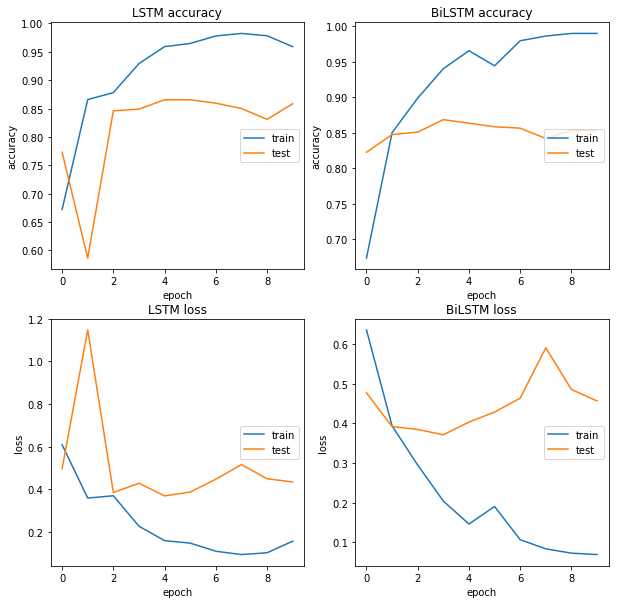

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))

ax = plt.subplot2grid((2, 2), (0, 0))
plt.plot(lstm_history.history['acc'])
plt.plot(lstm_history.history['val_acc'])
plt.title('LSTM accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')

ax2 = plt.subplot2grid((2, 2), (1, 0))
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('LSTM loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')

ax3 = plt.subplot2grid((2, 2), (0, 1))
plt.plot(bilstm_history.history['acc'])
plt.plot(bilstm_history.history['val_acc'])
plt.title('BiLSTM accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')

ax4 = plt.subplot2grid((2, 2), (1, 1))
plt.plot(bilstm_history.history['loss'])
plt.plot(bilstm_history.history['val_loss'])
plt.title('BiLSTM loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')

plt.show()


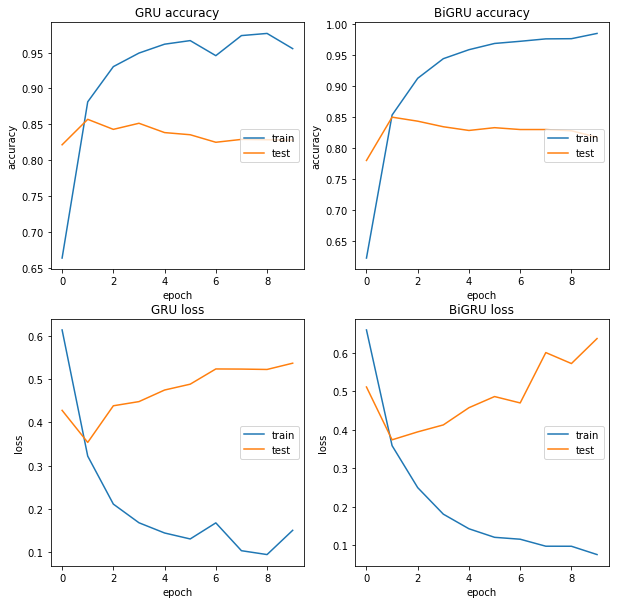

In [39]:
plt.figure(figsize=(10,10))

ax = plt.subplot2grid((2, 2), (0, 0))
plt.plot(gru_history.history['acc'])
plt.plot(gru_history.history['val_acc'])
plt.title('GRU accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')

ax2 = plt.subplot2grid((2, 2), (1, 0))
plt.plot(gru_history.history['loss'])
plt.plot(gru_history.history['val_loss'])
plt.title('GRU loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')

ax3 = plt.subplot2grid((2, 2), (0, 1))
plt.plot(bigru_history.history['acc'])
plt.plot(bigru_history.history['val_acc'])
plt.title('BiGRU accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')

ax4 = plt.subplot2grid((2, 2), (1, 1))
plt.plot(bigru_history.history['loss'])
plt.plot(bigru_history.history['val_loss'])
plt.title('BiGRU loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')

plt.show()

In [40]:
#Validate all models on unseen set.
X_valid = np.load(os.path.join(DATA_PATH,'X_valid_word.npy'))
y_valid = np.load(os.path.join(DATA_PATH,'y_valid_word.npy'))

X_valid = X_valid[2000:12000]
y_valid = y_valid[2000:12000]

print(X_valid.shape, y_valid.shape)

(10000, 500) (10000,)


In [41]:
evaluate_lstm = lstm_model.evaluate(x=X_valid, y=y_valid, batch_size=None, verbose=1, sample_weight=None, steps=None)

evaluate_bilstm = bilstm_model.evaluate(x=X_valid, y=y_valid, batch_size=None, verbose=1, sample_weight=None, steps=None)

evaluate_gru = gru_model.evaluate(x=X_valid, y=y_valid, batch_size=None, verbose=1, sample_weight=None, steps=None)

evaluate_bigru = bigru_model.evaluate(x=X_valid, y=y_valid, batch_size=None, verbose=1, sample_weight=None, steps=None)

10000/10000 [==============================] - 46s 5ms/step


In [42]:
print(lstm_model.metrics_names)
print(evaluate_lstm)
print(evaluate_bilstm)
print(evaluate_gru)
print(evaluate_bigru)

['loss', 'acc']
[0.4889523887872696, 0.8396]
[0.47154123816490173, 0.8499]
[0.5295522632956505, 0.8358]
[0.6632716488599777, 0.8029]


#### Present table comparison of model performance

#### Answer:

=== write your answer here ===

(can also be presented as figure of table)

### 3. Feature extraction

#### Tasks: 

* Choose one model with the best performance and use the model to produce ”neural codes” (document embedding) of raw text (5000 instances of unseen validation set) from RNN layer.
*  Use tSNE to reduce the dimension of extracted text features (encoded version of 5000 documents) into two (2) dimensions and visualize it towards their sentiment labels.


In [27]:
# load the trained model
from keras.models import load_model

# YOUR CODE HERE
# choose the best model

model = load_model('')
model.load_weights('')

ValueError: Invalid file name (Invalid file name)

#### Produce Neural codes of text reviews

In [ ]:
# YOUR CODE HERE

# define sub model to retrieve "neural codes" (document embedding) from recurrent layer
encoder_model =

# generate "neural codes" (document embedding) from the model
doc_embedding =

#### tSNE visualization

In [ ]:
# YOUR CODE HERE

# use tSNE to plot document embedding on its sentiment label

### 4. One shot learning on multi-class classification

#### Tasks: 

* Use the RNN model that has been trained on binary classification task to extract features from different data set (Amazon product reviews)
* Define and implement an approach to assign labels on unlabelled set of reviews, by using the concept of "one shot learning"
* Compute accuracy, given ground truth labels
* Discuss the results 

Explain how the approach works.


#### Answer:

=== write your answer here ===

In [ ]:
# YOUR CODE HERE

# one shot learning task


# compute overall accuracy, given ground truth labels
accuracy = 

Discuss the result. Why it works -- or why it does not work.

#### Answer:

=== write your answer here ===